In [1]:
import pandas as pd

# File path
file_path = r'C:\Users\nnaya\Desktop\JOB\project\house-price-predictions\house-price-predictions\data\processed\cleaned_data.csv'

# Load the CSV
df = pd.read_csv(file_path)

# Print all column names as a list
print("Columns:\n", list(df.columns))


Columns:
 ['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup', 'latitude', 'longitude', 'medhouseval']


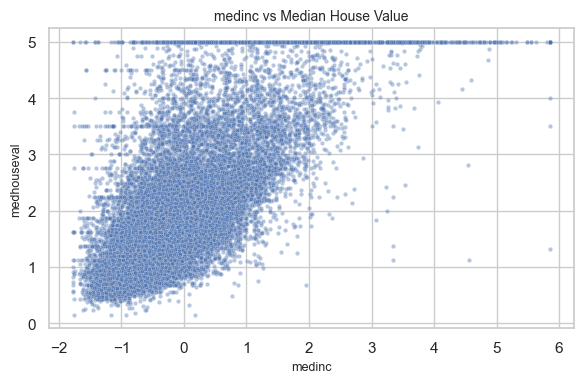

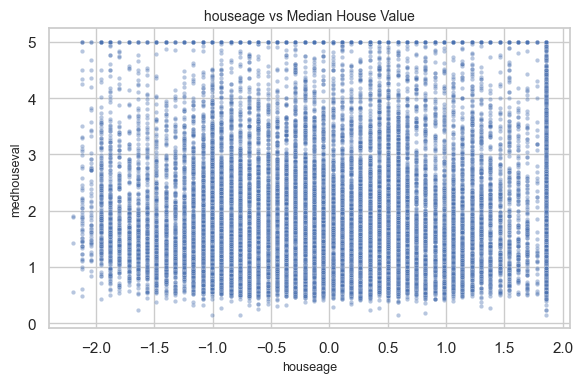

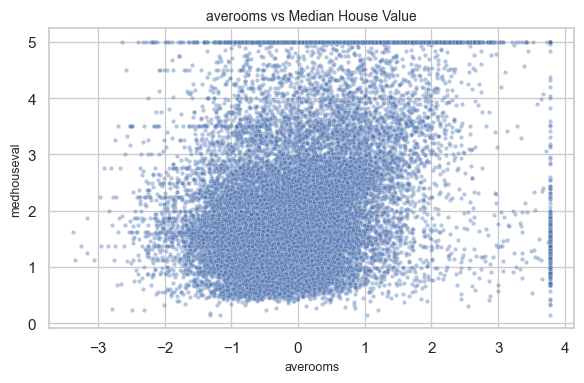

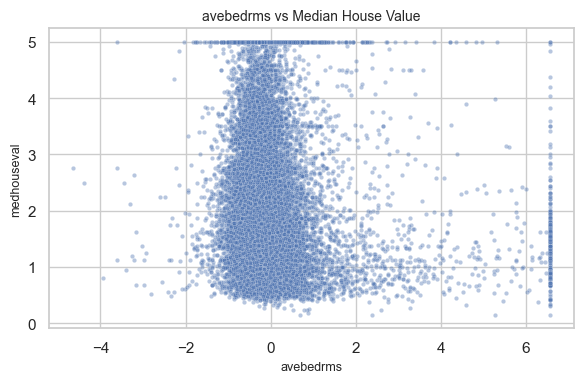

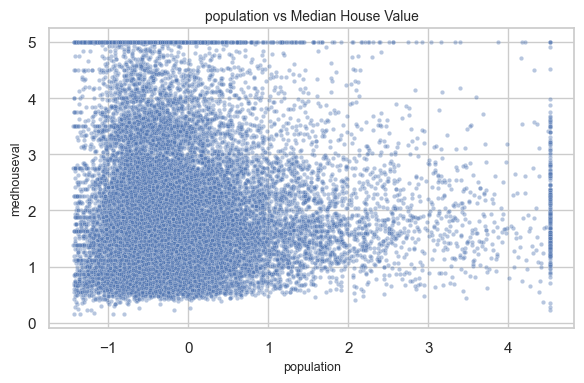

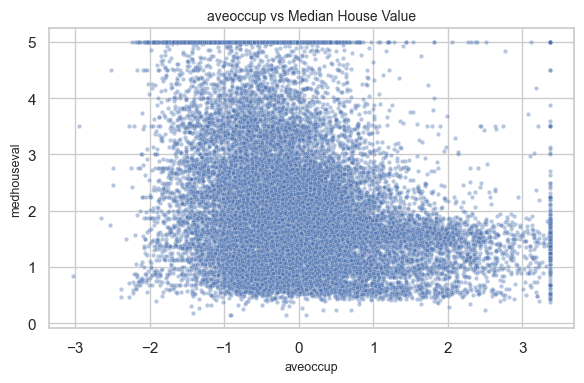

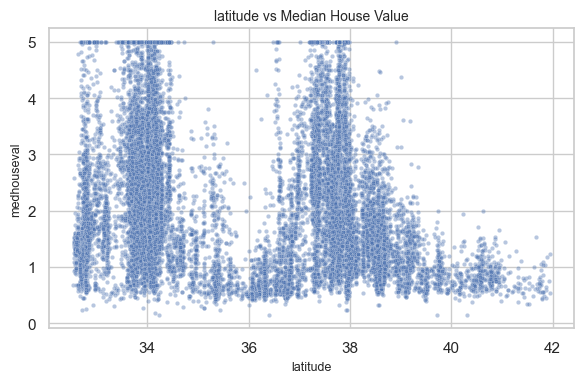

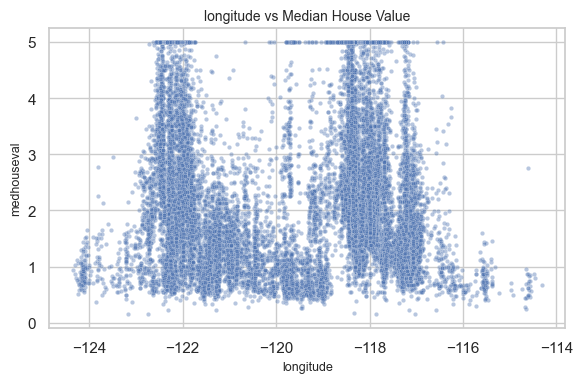

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set style
sns.set(style="whitegrid")

# Features (excluding target)
features = ['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup', 'latitude', 'longitude']

# Plot each feature vs medhouseval
for feature in features:
    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.scatterplot(data=df, x=feature, y='medhouseval', alpha=0.4, s=10)
    plt.title(f'{feature} vs Median House Value', fontsize=10)
    plt.xlabel(feature, fontsize=9)
    plt.ylabel('medhouseval', fontsize=9)
    plt.tight_layout()
    plt.show()


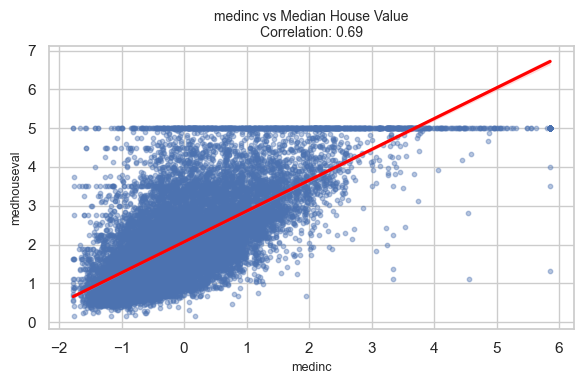

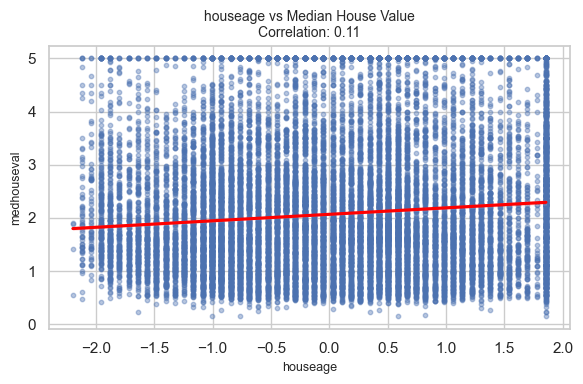

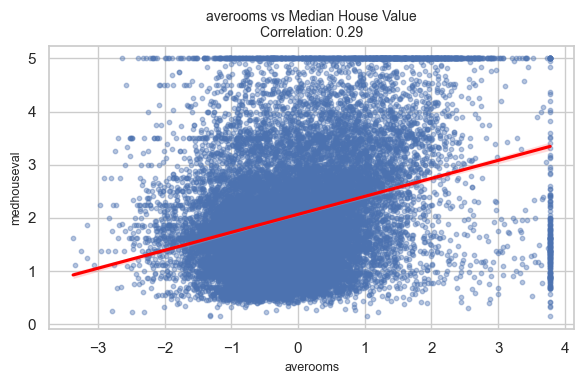

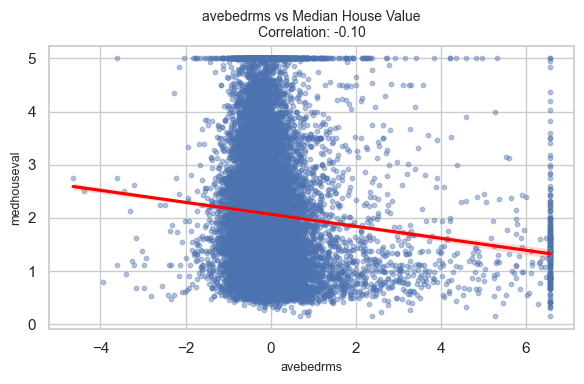

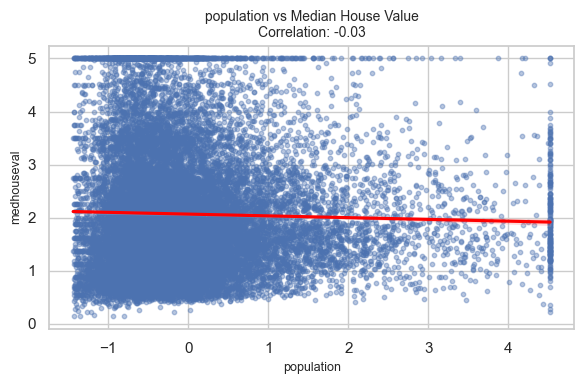

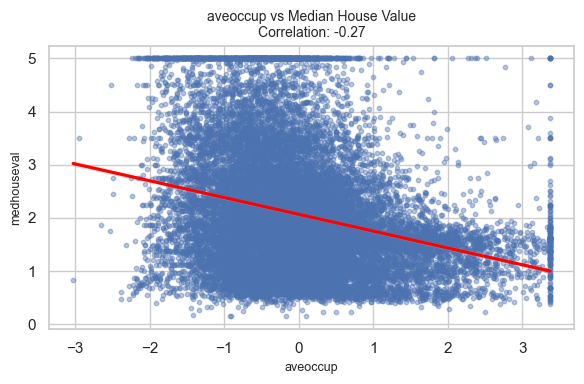

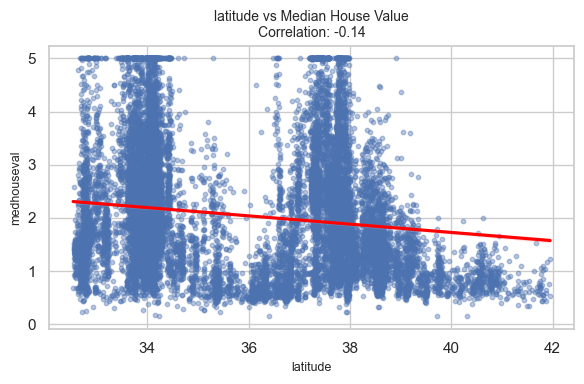

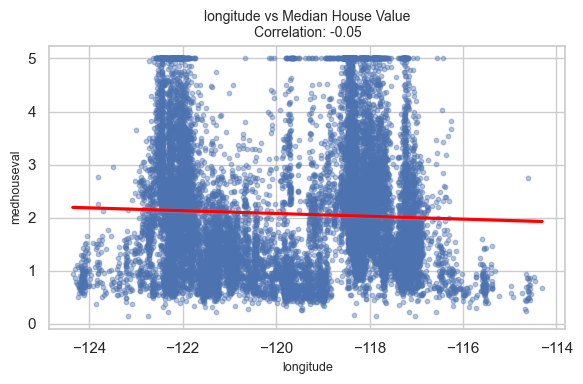

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
file_path = r'C:\Users\nnaya\Desktop\JOB\project\house-price-predictions\house-price-predictions\data\processed\cleaned_data.csv'
df = pd.read_csv(file_path)

# Set seaborn style
sns.set(style="whitegrid")

# Features (exclude target)
features = ['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup', 'latitude', 'longitude']

# Plot with regression line and correlation coefficient
for feature in features:
    plt.figure(figsize=(6, 4))

    # Plot with regression line
    sns.regplot(data=df, x=feature, y='medhouseval', scatter_kws={'s': 10, 'alpha': 0.4}, line_kws={'color': 'red'})

    # Calculate correlation
    corr = np.corrcoef(df[feature], df['medhouseval'])[0, 1]

    # Title with correlation
    plt.title(f'{feature} vs Median House Value\nCorrelation: {corr:.2f}', fontsize=10)
    plt.xlabel(feature, fontsize=9)
    plt.ylabel('medhouseval', fontsize=9)

    plt.tight_layout()
    plt.show()


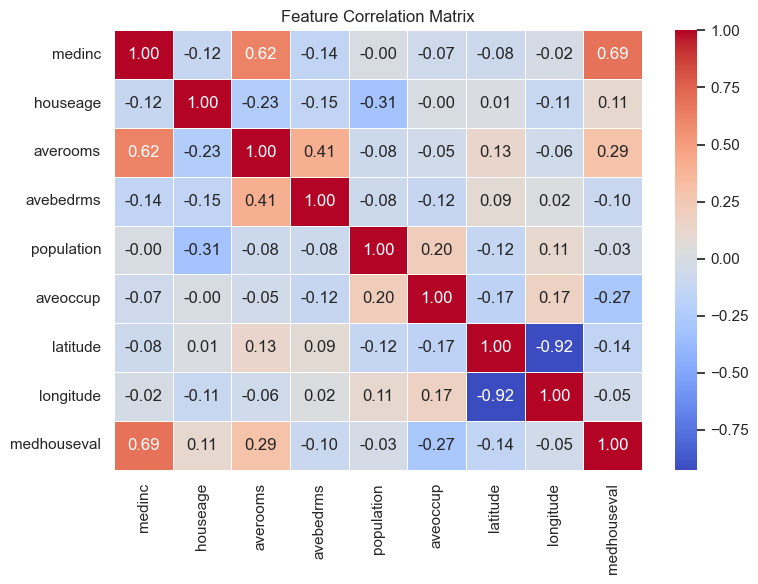

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r'C:\Users\nnaya\Desktop\JOB\project\house-price-predictions\house-price-predictions\data\processed\cleaned_data.csv'
df = pd.read_csv(file_path)

# Set style
sns.set(style="white")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=12)
plt.tight_layout()
plt.show()



In [6]:
import pandas as pd

# Load data
file_path = r'C:\Users\nnaya\Desktop\JOB\project\house-price-predictions\house-price-predictions\data\processed\cleaned_data.csv'
df = pd.read_csv(file_path)

# Compute correlation with the target
correlation = df.corr(numeric_only=True)['medhouseval'].drop('medhouseval')

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Display
print("Correlation with medhouseval:\n")
print(correlation_sorted)



Correlation with medhouseval:

medinc        0.688075
averooms      0.293026
houseage      0.105623
population   -0.028852
longitude    -0.045967
avebedrms    -0.097651
latitude     -0.144160
aveoccup     -0.273876
Name: medhouseval, dtype: float64


In [7]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Load dataset
file_path = r'C:\Users\nnaya\Desktop\JOB\project\house-price-predictions\house-price-predictions\data\processed\cleaned_data.csv'
df = pd.read_csv(file_path)

# Split features and target
X = df.drop('medhouseval', axis=1)
y = df['medhouseval']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # Set k='all' to rank all
fit = selector.fit(X, y)

# Get scores and map to column names
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)

print("📊 SelectKBest Feature Scores:")
print(scores)


📊 SelectKBest Feature Scores:
      Feature         Score
0      medinc  18556.571631
2    averooms   1938.511809
5    aveoccup   1673.549646
6    latitude    438.005453
1    houseage    232.841479
3   avebedrms    198.693770
7   longitude     43.698976
4  population     17.193729
